<a href="https://colab.research.google.com/github/YoonhoNam/hufsclass/blob/master/ch3_03_image_classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5. The Image Classification Dataset

- 이번 실습은 pytorch에서 제공하고 있는 image dataset인 fashion-mnist를 다운로드하고, minibatch단위로 data를 불러오는 것을 구현하고 확인하겠습니다.

In [0]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt
import numpy as np

## 3.5.1. Getting the Dataset

데이터를 구글드라이브에 저장하기 위하여 드라이브 마운트를 먼저 실행해줍니다. 각자의 환경에 따라서 아래의 cell을 실행해야 할 수도 있고, gui를 통해 자동으로 마운트가 될 수도 있습니다. colab이 아닌 본인의 컴퓨터에서 실습하는 경우에는 아래의 cell을 실행할 필요 없습니다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터를 저장할 본인의 구글드라이브폴더 또는 하드드라이브의 위치를 지정해 줍니다.

In [0]:
root = '/content/drive/My Drive/hufs'

torchvision.datasets에는 널리 쓰이는 dataset들을 포함하고 있습니다. 
- fashionMNIST를 다운로드하되, train과 test를 나누어 저장합니다. 
- FashionMNIST data는 pytorch tensor의 형태로 저장되어 있지 않기 때문에, ToTensor()를 transform에 넣어 줄 것입니다.

In [0]:
pil2tensor = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root, train=True, transform=pil2tensor, target_transform=None, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root, train=False, transform=pil2tensor, target_transform=None, download=True)

train과 test에 포함된 각각 example의 개수를 확인합니다.

In [5]:
len(mnist_train), len(mnist_test)

(60000, 10000)

train set에서 처음 8개 example에 대한 data와 label을 각각 X, y로 불러옵니다.

In [12]:
X = mnist_train.data[:8]
y = mnist_train.targets[:8]
print(X.shape)
print(y.shape)

torch.Size([8, 28, 28])
torch.Size([8])


label은 0에서 9까지의 숫자로 되어 있습니다. 우리는 실제 숫자가 의미하는 단어를 알고 싶기 때문에 미리 알고 있는 정보를 이용하여 label의 실제 category를 얻는 함수를 아래와 같이 정의합니다.

In [0]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

가져온 데이터 중 첫 8개 example을 시각화해 보겠습니다.

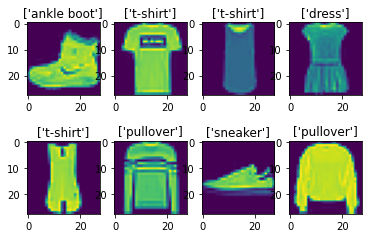

In [8]:
for n in range(8):
  plt.subplot(241+n)
  plt.imshow(X[n])
  plt.title(get_fashion_mnist_labels([y[n]]))

## 3.5.2. Reading a Minibatch

dataset을 minibatch단위로 가져오기 위해 pytorch의 dataloader함수를 이용합니다. 
- batch_size를 설정해 주어야 합니다.
- shuffle의 유무를 정해주어야 합니다. 
- num_workers를 0보다 큰 숫자로 하여 데이터 읽는 과정을 병렬화할 수 있습니다. 큰 데이터를 읽을 때 속도를 증가시킬 수 있습니다.

In [0]:
batch_size = 1000
num_workers = 0
train_iter = DataLoader(mnist_train, batch_size, shuffle=True, num_workers=num_workers)
test_iter = DataLoader(mnist_test, batch_size, shuffle=False, num_workers=num_workers)

60000개의 train set을 정의한 batch_size단위로 불러옵니다. 

In [10]:
start = time.time()
i = 0
for X, y in train_iter:
  continue
'%.2f sec' % (time.time() - start)

'4.44 sec'

가져온 minibatch에서 처음 4개의 image를 display하여 실제로 다른 example들을 가지고 오고 있는 지 확인해 봅시다.

minibatch #:  1


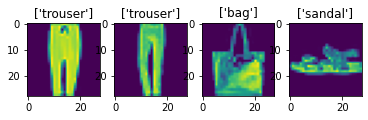

minibatch #:  2


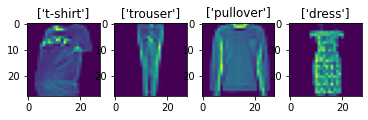

minibatch #:  3


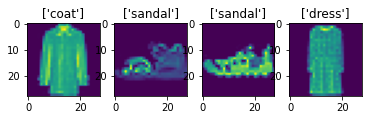

minibatch #:  4


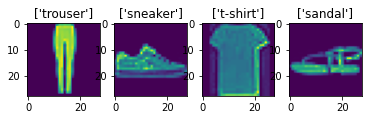

minibatch #:  5


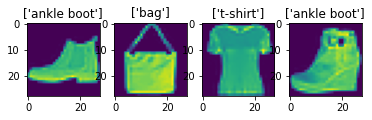

minibatch #:  6


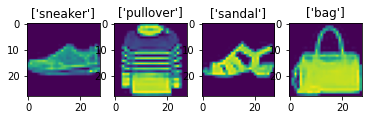

minibatch #:  7


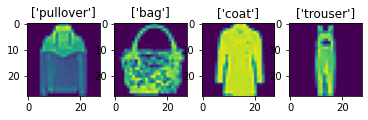

minibatch #:  8


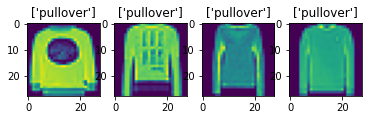

minibatch #:  9


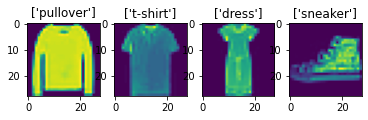

minibatch #:  10


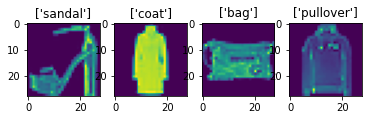

minibatch #:  11


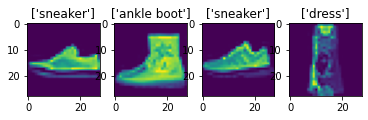

minibatch #:  12


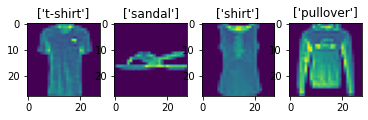

minibatch #:  13


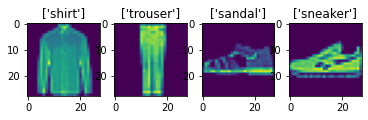

minibatch #:  14


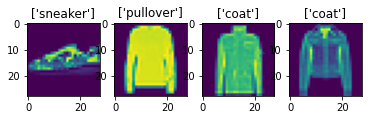

minibatch #:  15


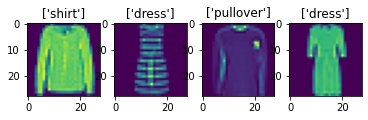

minibatch #:  16


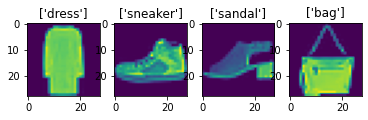

minibatch #:  17


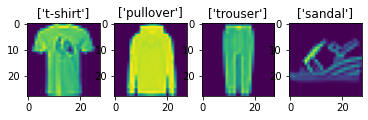

minibatch #:  18


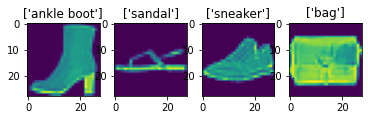

minibatch #:  19


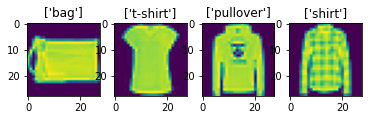

minibatch #:  20


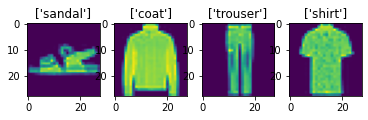

minibatch #:  21


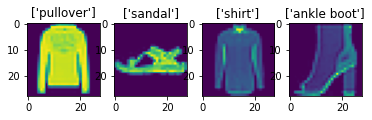

minibatch #:  22


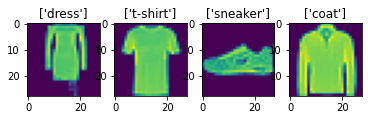

minibatch #:  23


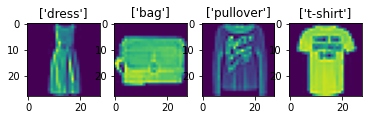

minibatch #:  24


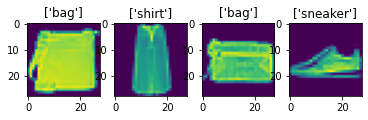

minibatch #:  25


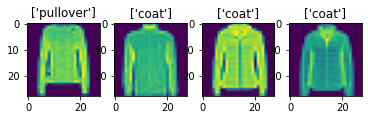

minibatch #:  26


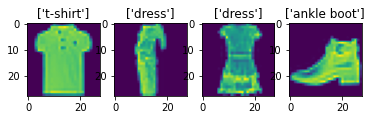

minibatch #:  27


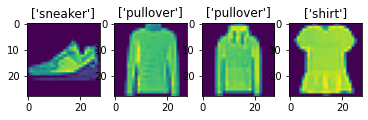

minibatch #:  28


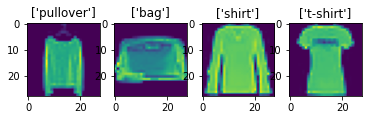

minibatch #:  29


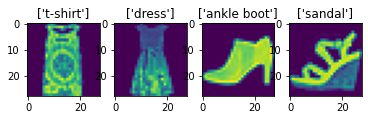

minibatch #:  30


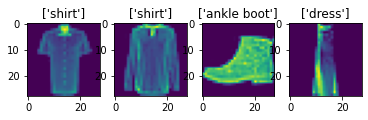

minibatch #:  31


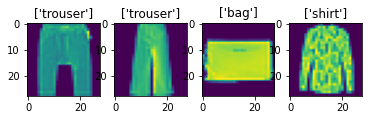

minibatch #:  32


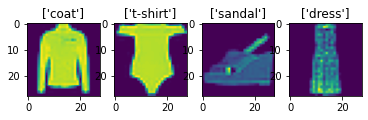

minibatch #:  33


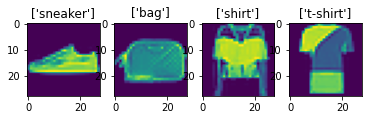

minibatch #:  34


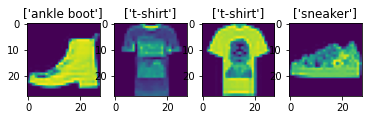

minibatch #:  35


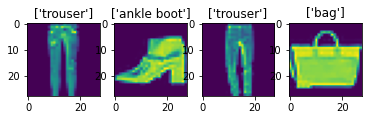

minibatch #:  36


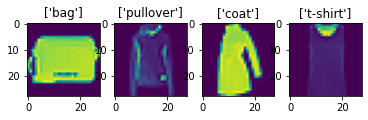

minibatch #:  37


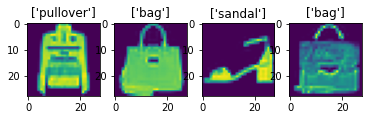

minibatch #:  38


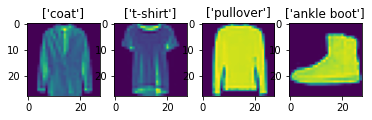

minibatch #:  39


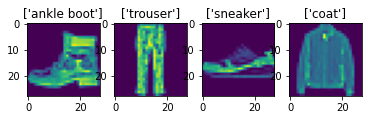

minibatch #:  40


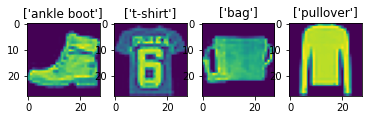

minibatch #:  41


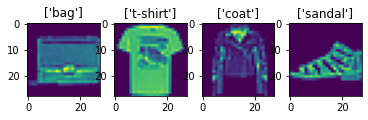

minibatch #:  42


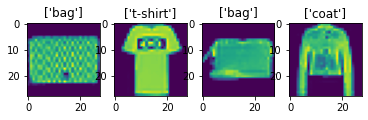

minibatch #:  43


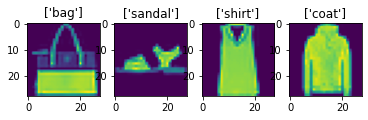

minibatch #:  44


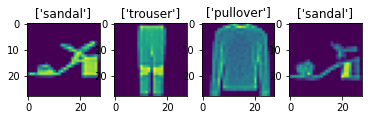

minibatch #:  45


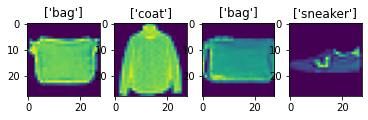

minibatch #:  46


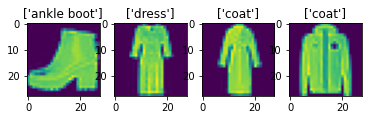

minibatch #:  47


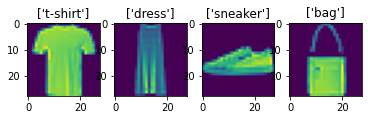

minibatch #:  48


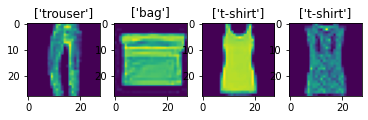

minibatch #:  49


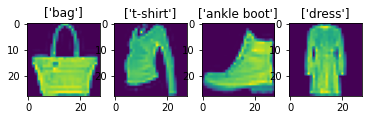

minibatch #:  50


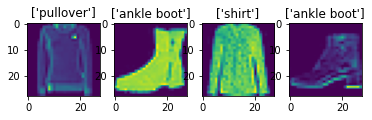

minibatch #:  51


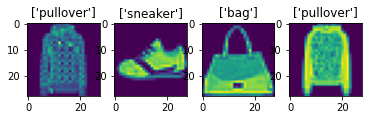

minibatch #:  52


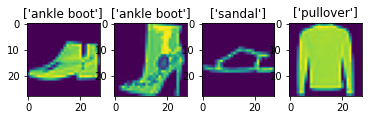

minibatch #:  53


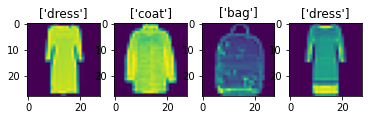

minibatch #:  54


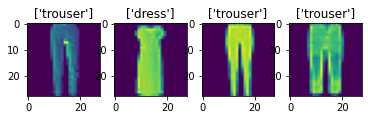

minibatch #:  55


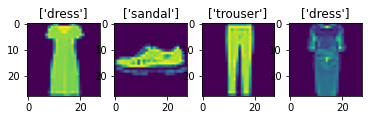

minibatch #:  56


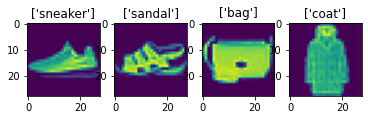

minibatch #:  57


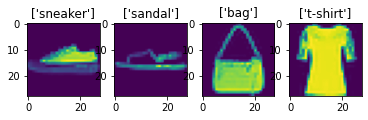

minibatch #:  58


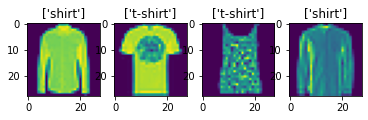

minibatch #:  59


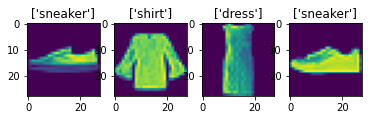

minibatch #:  60


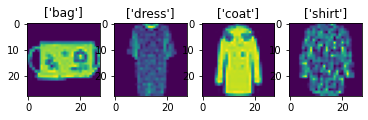

In [11]:
start = time.time()
i = 0
for X, y in train_iter:
  i=i+1
  print('minibatch #: ',i)
  for n in range(4):
    plt.subplot(141+n)
    plt.imshow(X[n].squeeze(dim=0))
    plt.title(get_fashion_mnist_labels([y[n]]))
  plt.show()
  continue